In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
import statsmodels.graphics.tsaplots as tsa_plots

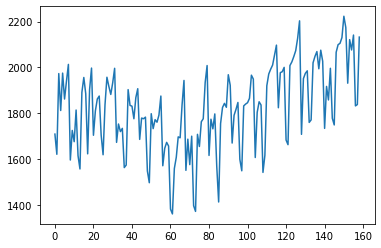

In [2]:
Walmart = pd.read_csv("/footfalls.csv")
Walmart.Footfalls.plot();

**Splitting data**

In [3]:
Train = Walmart.head(147)
Test = Walmart.tail(12)

**Moving Average**

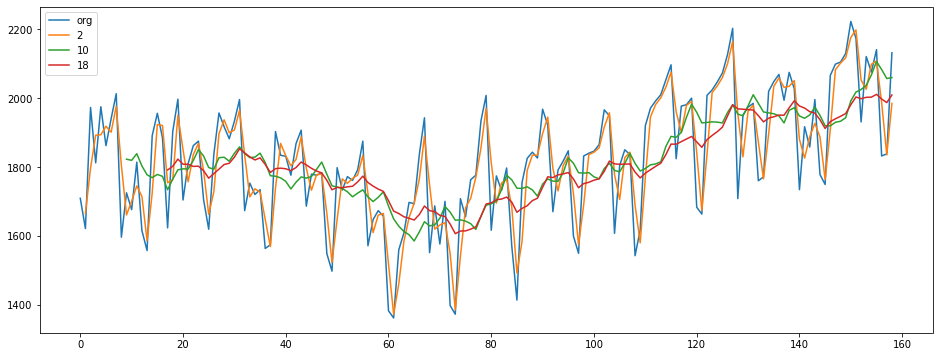

In [4]:
plt.figure(figsize=(16,6))
Walmart.Footfalls.plot(label="org")
for i in range(2,24,8):  # for range 2-24 with intervals of 8
    Walmart["Footfalls"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best');

### Time series decomposition plot

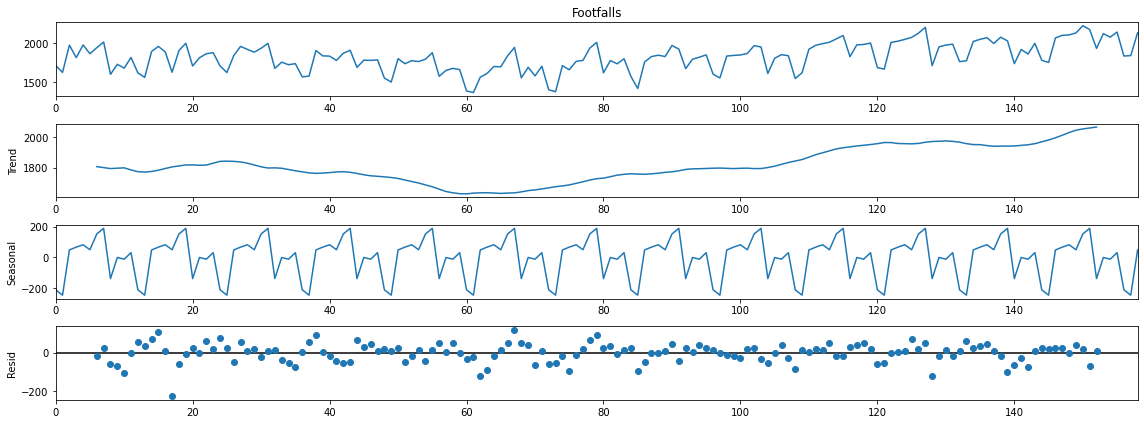

In [5]:
decompose_ts_add = seasonal_decompose(Walmart.Footfalls,period=12)
fig=decompose_ts_add.plot()
fig.set_size_inches((16, 6))
fig.tight_layout()
plt.show();

### ACF plots and PACF plots

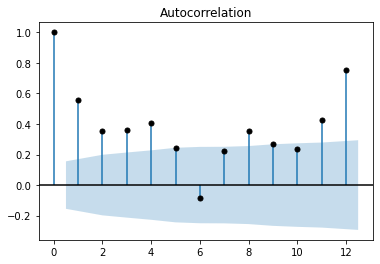

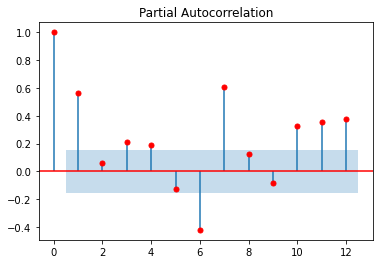

In [6]:
tsa_plots.plot_acf(Walmart.Footfalls,lags=12,color="black")
tsa_plots.plot_pacf(Walmart.Footfalls,lags=12,color="red")
plt.show();

### Evaluation Metric MAPE

In [7]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

### Simple Exponential Method

In [8]:
ses_model = SimpleExpSmoothing(Train["Footfalls"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Footfalls) 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


8.490637057828362

### Holt method 

In [9]:
 hw_model = Holt(Train["Footfalls"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Footfalls) 

<ipython-input-9-2d134730391d>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(Train["Footfalls"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


7.546249229496066

### Holts winter exponential smoothing with additive seasonality and additive trend

In [10]:
hwe_model_add_add = ExponentialSmoothing(Train["Footfalls"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Footfalls) 

3.7505010397295067

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [11]:
hwe_model_mul_add = ExponentialSmoothing(Train["Footfalls"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Footfalls)

3.939821065755419

## Final Model by combining train and test

In [12]:
hwe_model_add_add = ExponentialSmoothing(Walmart["Footfalls"],seasonal="add",trend="add",seasonal_periods=12).fit()

In [13]:
#Forecasting for next 10 time periods
pd.DataFrame(hwe_model_add_add.forecast(10))

,0
159,2159.049612
160,2184.181287
161,2175.047623
162,2259.531412
163,2274.782926
164,1973.579880
165,2149.808584
166,2125.710663
167,2174.849726
168,1909.325993
